## Task2:
## Data Cleaning and Exploratory Data Analysis of Titanic Dataset

In [2]:
# For the analysis of titanic Data set load the file train.csv 

## Step 1: 

####  Import all necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Step 2:

#### Download  the titanic Dataset from kaggle and Load the file  Train .csv file for analysis of data 

In [8]:
train_df=pd.read_csv(r"C:\Users\seenu\Desktop\prodigy\titanic\train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 3:

### Understand the data

In [11]:
train_df.shape   # It shows rows and columns

(891, 12)

In [12]:
id(train_df)  #it gives address of data

3212498633840

In [13]:
train_df.info()   #It gives information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
cat_col=train_df.select_dtypes(include=['object']).columns.tolist()   #displays categorical variables
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

num_col=train_df.select_dtypes(include=['number']).columns.tolist()   #Numerical variables
num_col

In [16]:
train_df.describe()  # It gives statistical information of tiatanic dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_df.isnull().sum     # to check any missing values  (raw data)

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

#### As shown above wa can find out columns Age,cabin,Embarked  have missing values

## Step 4:
##  clean the data

### 4.1. Drop the less Used columns



In [21]:
train_df.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Dropped columns and reasons

- Cabin  :   Too many  mising values and format is not standardized
- Ticket :  Alphanumeric codes with no clear pattern hard to extract insights
- Name   :    Not useful for analysis directly(Mr/Mrs)
- PassengerId   :Just an identifier not used for insights

## 4.2 Handle the Missing values

In [25]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())  #Here missing values are replaced with median()

In [26]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()) 

In [28]:
train_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

## 4.3 Convert into Categorical variables

In [30]:
train_df['Sex']=train_df['Sex'].map({'male':'0','female':'1'})
train_df['Embarked']=train_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [31]:
train_df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [32]:
train_df['Embarked']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

- Here we use mapping encoding to cange 'Sex '  categorical columns(male,female)value to numerical 0 and 1 numerical
-  same as for 'Embarked' column value change =({s:'0','C':1,'Q':2)

In [34]:
#Now all useful data columns cleaned and encoded ready for Exploratory Data Analysis

In [35]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


## Step 5: Exploaratory Data Analysis

### 5.1. Survival  by Gender

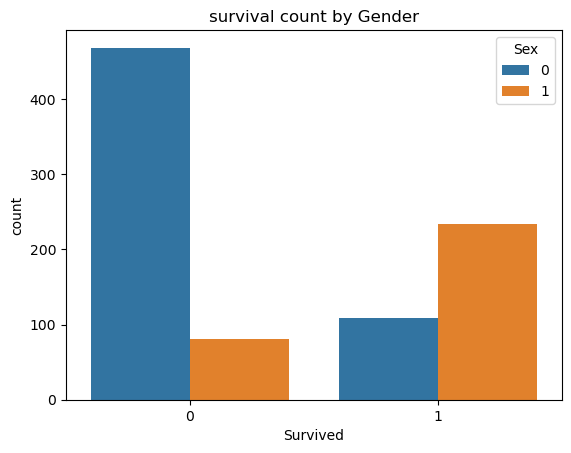

In [38]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data=train_df)
plt.title('survival count by Gender')
plt.show()

 ## 📈 Insights from the plot
 The X-axis left side graph(0) shows deaths, the right side shows survivors(1), and
 the color(blue=male, orange=female) split tells us how gender impacted
 survival.
 
 ###  🟦 Blue Bars (Sex = 0 → Male)
-  Most males did not survive (left bar is very tall for Survived = 0).
- Only a small number of males survived (right blue bar is much shorter).
 
 ###  🟧 Orange Bars (Sex = 1 → Female)
 - Most females survived (right orange bar is taller than left).
 - Fewer females died (left orange bar is shorter)

## 5.2.Age Distribution

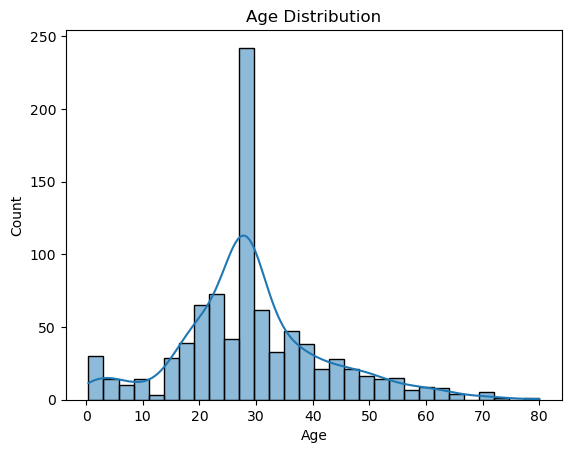

In [41]:
sns.histplot(train_df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

## 📊 Detailed Insights from the Age Distribution Plot
### Right-Skewed Distribution:

- The histogram shows a slight right-skew, meaning more passengers were younger.

- The peak (mode) occurs around 20–30 years, indicating this was the most common age group.

### KDE Line Adds Smoothing:

- The smooth KDE curve helps us understand the underlying distribution.

- It confirms that the majority of passengers were young adults.

Children (0–10 years):

- A noticeable spike near age 0–10 indicates that a number of children were on board, although fewer than adults.

Ages 30–50:

- There is a moderate number of passengers between 30 and 50 years, forming a broad plateau in the KDE line.

- This age range appears more evenly distributed.

### Fewer Elderly Passengers:

Very few passengers were above 60 years, and the frequency drops sharply after age 60.

## 5.3.Survival by class

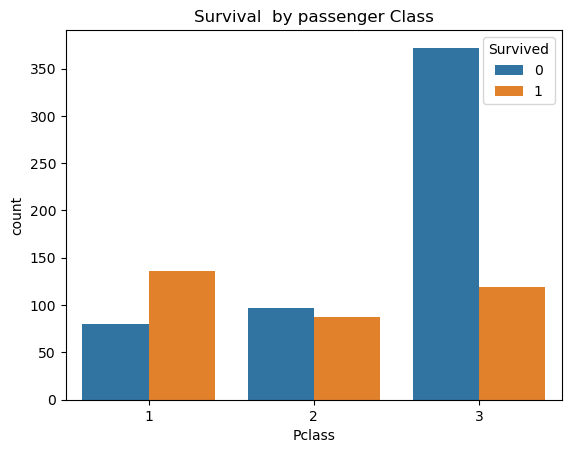

In [44]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title('Survival  by passenger Class')
plt.show()

## 📊 Graph Overview
- X-axis: Passenger Class (Pclass – 1st, 2nd, 3rd).

- Hue: Survival status (0 = Did not survive, 1 = Survived).

- Y-axis: Number of passengers.

- Bars: Represent counts, split into survivors and non-survivors for each class.

## 🔍 Insights
1. 1st Class Had the Highest Survival Rate:

- The light-colored (survived) bar is taller than the dark (non-survived) bar.

Shows that most 1st class passengers survived.

2. 3rd Class Faced the Highest Fatality Rate:

- The dark bar dominates, indicating that majority of 3rd class passengers did not survive.

Survival chances were significantly lower in this class.

3. 2nd Class Shows Balanced Distribution:

- The bars for survival and non-survival are more evenly split, suggesting a moderate survival rate for 2nd class.

Clear Socioeconomic Impact on Survival:

- The trend indicates that higher class = higher chance of survival.

Access to lifeboats and priority during evacuation likely favored 1st class.

## 📝 Summary
-  Survival was strongly correlated with passenger class.

- 1st class passengers had the best chance, followed by 2nd, and 3rd class had the worst outcomes.

- This highlights the role of socioeconomic status in survival, a key pattern in the Titanic dataset.

## 5.4 Correlation Map

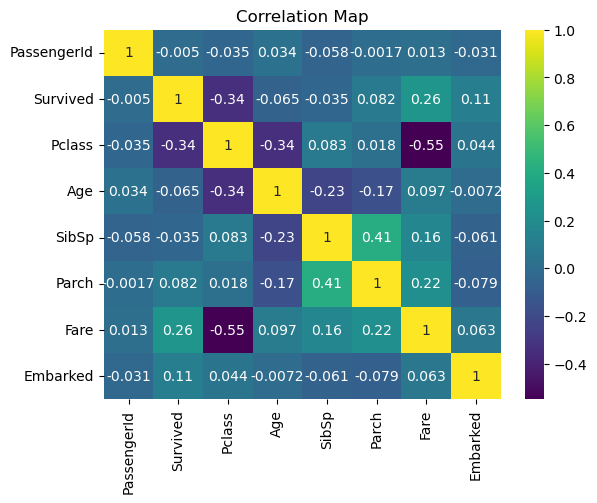

In [57]:
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.title('Correlation Map')
plt.show()

## Abouth the heat map

- A correlation heatmap shows the linear relationship between numerical features.
- Values range from -1 to +1:
    - +1: Perfect positive correlation
    - -1: Perfect negative correlation
    - : No correlation

- Generated using  sns.heatmap() with  cmap='coolwarm' .
 



# 📌 Key Insights:
 - 🎯 Correlations with Survival (Survived):
   
 🔹 **Sex (0.54) – Strongest positive correlation** → Being female (typically encoded
 as 1) was strongly associated with survival.
 
 🔹 **Fare (0.26) – Moderate positive correlation** → Higher fare passengers had a
 better chance of survival (likely wealthier).
 
 🔹 **Pclass (-0.34) – Moderate negative correlation**→ Lower class number (1st
 class) had better survival; higher class (3rd) had lower survival chances.

##  📉 Other Feature Relationships:
 - 🔹**SibSp & Parch (0.41)**   – Moderate positive correlation
 → Passengers with siblings/spouses often also had parents/children aboard.
 - 🔹**Pclass & Fare (-0.55)**  – Strong negative correlation
 -  Higher class passengers paid more fare (1st class had higher fares).
 - 🔹**Age & Parch (-0.17)**    – Mild negative correlation
 → Younger passengers more likely traveled with parents.

## ✅  Summary Points:
 - 🚺Gender is the most influential factor in survival (females had better chances).
 - 💰 Wealth (indicated by Fare & Pclass) significantly influenced survival.
 Traveling with family (SibSp/Parch) has mild correlation with other factors, but
 limited influence on survival.
 - 👶 Age shows weak correlation with survival but may be more influential when
 combined with other features (like family presence or class).
